# Data ScienceTutorial for Beginners
<b>Pokemon- Weedle's Cave</b>

# 3- Cleaning Data
. Diagnose data for cleaning<br>
. Exploratory data analysis<br>
. Visual exploratory data analysis<br>
. Tidy data<br>
. Pivoting data<br>
. Concatenating data<br>
. Data types<br>
. Missing data and testing with assert


In [273]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [274]:
data = pd.read_csv('Dataset/archive/pokemon.csv')

Bize verilen setini kullanarak data'yı tespit etmemiz gerekiyor. Data tesbiti için belli başlı temel methodları kullanarak data hakkında çıkarımlar da bulanabiliriz.Örneğin; kaç tane pokemon var, kaç column'dan oluşuyor, bu column'ların ismi ne, data veri tipleri ne vs. gibi sorularımıza cevap bulabiliriz.

In [275]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [276]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [277]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [278]:
data.shape

(800, 12)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# EXPLORATORY DATA ANALYSIS
<b>value_counts():</b> Frequency counts<br>
<b>outliers: </b>the value that is considerably higher or lower from rest of the data<br>
Örneğin; 100 tane evin fiyat aralığı 100$ - 1000$ arasındayken 101. evin fiyatını 100.000$ dolar olması bir outlier'dır. Diğer datalardan çok fazla yukarıda. Bu bir aykırı sayıdır.<br>
Girilen rakam ne kadar yukarıda ya da aşağıda olursa biz bunu aykırı sayı olurak kabul edebiliriz?<br><br>

Lets say value at 75% is Q3 and value at 25% is Q1.<br>
Outlier are smaller than <b>Q1 - 1.5(Q3-Q1)</b> and bigger than <b>Q3 + 1.5(Q3-Q1)</b>. (Q3-Q1) = IQR<br>
We will use describe() method. Describe method includes:<br>
<b>count:</b> number of entries<br>
<b>mean:</b> average of entries<br>
<b>std:</b> standart deviation<br>
<b>min:</b> minimum entry<br>
<b>25%:</b> first quantile<br>
<b>50%:</b> median or second quantile<br>
<b>75%:</b> third quantile<br>
<b>max:</b> maximum entry<br><br>

<b>What is quantile?</b><br><br>

1,4,5,6,8,9,11,12,13,14,15,16,17<br>
<b>The median</b> is the number that is in middle of the sequence. In this case it would be 11.<br>

<b>The lower quartile</b> is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.<br>
* lower quartile = Q1 = %25<br>

<b>The upper quartile</b>, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.<br>
* upper quartile = Q3 = %75<br>

<b>value_counts()</b> methodunu sıkça kullanırız. 'Type 1' colums name bize pokemon türünü verir. value_counts() methodunu kullanarak ise hangi pokemon'dan kaç tane olduğu hakkında bilgi alabiliriz.

In [280]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna = False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


Yukarıda bahsettiğimiz tüm istatiksel hesaplamaların sonucunu tek bir method kullanarak değerlere ulaşabiliriz.<br>
Bu method <b>describe()</b> methodudur.

<img src="a.JPG"/>

In [281]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## VISUAL EXPLORATORY DATA ANALYSIS
<b>Box plots:</b> visualize basic statistics like outliers, min/max or quantiles<br><br>
Whisker plot olarak da bilinen bir box plot , minimum, birinci çeyrek(low quarter), medyan(median), üçüncü çeyrek(upper quarter) ve maksimum gibi özelliklere sahip veri değerleri kümesinin özetini görüntülemek için oluşturulur. Kutu grafiğinde, ilk çeyrekten üçüncü çeyreğe kadar bir kutu oluşturulur, ortancada kutudan geçen dikey bir çizgi de vardır. Burada x ekseni çizilecek verileri gösterirken y ekseni frekans dağılımını gösterir.<br><br>
<b>boxplot()</b> methodu kullanarak min,max,median, upper/lower quarter ve outliers görsel olarak analiz edebiliriz.

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


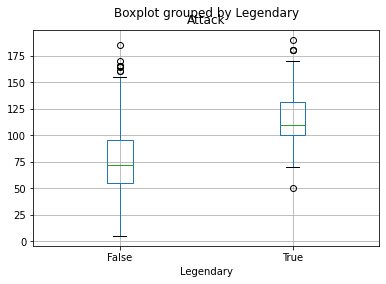

In [282]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Green line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary')

# TIDY DATA
We tidy data with <b>melt()</b>. Describing melt is confusing.

In [283]:
# Firstly I create new data from pokemons data to explain melt nore easily.
data_new = data.head()    # I only take 5 rows into new data
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Yukarıdaki datamızdan yeni belli başlı featurelar çıkartarak datanın değerleri sabit kalacak şekilde farklı bir yapıya büründürme işlemini yapacağız. Bu işlem için <b>melt()</b> methodunu kullanacağız.<br>
<b>frame:</b> melt edeceğimiz datamız,<br>
<b>id_vars:</b> Verilen datayı handi id'ye göre melt edeceğinin bilgisi,<br>
<b>value_vars:</b> yeni data oluşturduğumuzda variable ve value değerlerini burada girilen column name göre yapılır.

In [284]:
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


melt() methodunu kullanarak seaborn kütüphanesi ile  veri görselleştirmesi yapacağız. Bu duruma pandas ve seaborn arasında köprü diyebiliriz.

# PIVOTING DATA¶
Reverse of melting.   

In [285]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


# CONCATENATING DATA
We can concatenate two dataframe

In [286]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index = True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


<b>concat</b> edilecek dataları array olarak gir,<br>
<b>axis:</b> 0 (dikey olarak birleştir), 1 (yatay olarak birleştir).<br>
<b>ignore_index:</b> True ( datanın kendi index numarasını yoksay ve 0 dan başlayarak yeni index numaralarını ata), False

In [287]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


Machine Learning'de algoritması yazmadan önce genellikle datayı hazırlmamız gerekir. Bu datayı hazırlarken bu tip methodları çok sık kullanırız.

# DATA TYPES
There are 5 basic data types: <b>object(string),boolean, integer, float and categorical.</b>
We can make conversion data types like from str to categorical or from int to float<br>
Why is category important:<br><br>

make dataframe smaller in memory<br>
can be utilized for anlaysis especially for sklearn(we will learn later)

In [288]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [289]:
int(0.8)

0

Yukarıdaki örnekte float bir variable'ı integer veri tipine convert ettik. Peki birden fazla variable nasıl convert edebiliriz?<br>
Bu sorunun cevabı <b>astype()</b> methodudur. Aşağıdaki örnekte verilen column name'i astype() methodu ile istenilen data tipine çevrilmiştir.

In [290]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [291]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

# MISSING DATA and TESTING WITH ASSERT¶
If we encounter with missing data, what we can do:<br><br>

  . leave as is<br>
  . drop them with <b>dropna()</b><br>
  . fill missing value with <b>fillna()</b><br>
  . fill missing values with test statistics like mean<br>
<b>Assert statement:</b> check that you can turn on or turn off when you are done with your testing of the program

In [292]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


Charmander pokemonun Type 2 değeri "NaN" olarak girilmiş. Gerçekten değeri mi yok ya da değeri olmasına rağmen yazılmamış mı? Bu sorunun cevabını bulmak için bazı datayı bazı methodlar kullanarak analiz edeceğiz.<br><br>
1. Değerini öylece bırakabiliriz,<br>
2. NaN olanları tablodan kaldırabiliriz,<br>
3. Değersiz valuları NaN ile doldurabiliriz,<br>
4. Tablodaki diğer valuların ortalama değerini vererek doldurabiliriz.

In [293]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 65.0+ KB


386 tane Type 2 pokemonun değeri yok. <b>value_count()</b> methodu ile Type 2 deki farklı değerleri bakıp analiz edelim.<br>
<b>dropna:</b> True (NaN olan deperleri kaldır) , False

In [294]:
# Lets chech Type 2
data["Type 2"].value_counts(dropna = False)
# As you can see, there are 386 NAN value

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Water        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [295]:
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

<b>*** dropna()</b> methodu ile değeri NaN olanları tablodan çıkardık.<br>
<b>inplace:</b> True (İşlem sonucunu data1'e kaydet), False

In [296]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true

<b>*** assert</b> hiç bir değer return etmediyse yaptığımız işlem başarılı olmuş demektir.

In [297]:
# In order to run all code, we need to make this line comment
# assert 1==2 # return error because it is false

Şimdi kendi işlemimizi kontrol edelim. Type 2'si NaN olan değişkenler başarılı bir şeklilde kaldırıldı mı? 

In [298]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

NaN değerlerini <b>*** fillna()</b> methodunu kullanarak istediğimiz bir şekilde doldurmayı deneyelim.

In [309]:
data["Type 2"].fillna('empty', inplace = True)

In [302]:
# # With assert statement we can check a lot of thing. For example
# assert data.columns[1] == 'Name'
# assert data.Speed.dtypes == np.int

-------------------------------

<b>Example:</b>

In [303]:
import numpy as np
import pandas as pd

In [304]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [5, np.nan, np.nan, 6],
                   [np.nan, 4, np.nan, 5]],
                 columns=list('PQRS'))
df

,P,Q,R,S
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,5.0,NaN,NaN,6
3,NaN,4.0,NaN,5


Replace all NaN elements with 0s.

In [305]:
df.fillna(0)

,P,Q,R,S
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,5.0,0.0,0.0,6
3,0.0,4.0,0.0,5


We can also propagate non-null values forward or backward.

In [306]:
df.fillna(method='ffill')

,P,Q,R,S
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,5.0,4.0,NaN,6
3,5.0,4.0,NaN,5


Replace all NaN elements in column ‘P’, ‘Q’, ‘R’, and ‘S’, with 0, 1, 2, and 3 respectively.

In [310]:
values = {'P': 0, 'Q': 1, 'R': 2, 'S': 3}
df.fillna(value=values)

,P,Q,R,S
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,5.0,1.0,2.0,6
3,0.0,4.0,2.0,5


Only replace the first NaN element.

In [311]:
df.fillna(value=values, limit=1)

,P,Q,R,S
0,0.0,2.0,2.0,0
1,3.0,4.0,NaN,1
2,5.0,1.0,NaN,6
3,NaN,4.0,NaN,5
